### Plain Recursion

There is a well-known joke going "to understand recursion, you must first understand recursion." But this joke and the people who make a mountain out of a molehill are doing an injustice to recursion. It is not so complicated as they make it sound. 

For now, the first few lines of this notebook may appear slightly confusing or difficult to grasp. I request your indlugence.  Very soon it will make sense. 

First, an optional background. If it does not makee sense, you can safely ignore it for now, since we will revisit this topic again. 
Let's consider purely functional programming languages (FPL), that is languages that make use of functions as building blocks of a program, in a rather mathematical way; Pure FPLs also do not allow data to be mutable, so no side effects emerge. This means, whatever data you input to the function, cannot be changed later. Finally, pure FPL also do not use iterations and loops. This discussion is really long and not suitable at this level, but suffice it to say that pure FPL treat programming the same way mathematical functions treat quantitative problems. 

Scheme is not a purely functional language, but it supports the Functional Programming paradigm (and also the other paradigms--more in the future notebooks). This means, it is more flexible than a pure FPL like Haskell. Scheme is especially suited for recursive and tail-recursive methods. This will become clear with some examples below. Let's start with a slightly more difficult example. It will become clearer as you proceed:



In [1]:
; consider this code:

(define evfun
  (lambda (x)
    (if (even? x)
      (+ 1 (evfun (/ x 2)))
      (evbar x))))


This part before evbar is called recursion: a function that is built of some conditions, one of which is a call to itself (using itself as part of creating itself!). 

Now consider:

In [2]:
(define evfun
  (lambda (x)
    (if (even? x)
      (+ 1 (evfun (/ x 2)))
      (evbar x))))

(define evbar
  (lambda (y)
    (* 3 y )))



So now the picture is completed, since also added a 'tail', that is the function evbar is defined so that it can be called, in the event the recursive call is false. 

After:

In [3]:
(evfun 2)

4

What happened? Why is the result 4?
Can you see why the result is 4?

In [4]:
(evfun 12)

11

Notice that the result with input 12 is rather not easy to intuit. 

Here is a step-by-step breakdown. I will keep the commentary to minimum now, since I think it is an interesting puzzle for you to following the trail and see how we come to 4, when the input to `evfun` is 2:

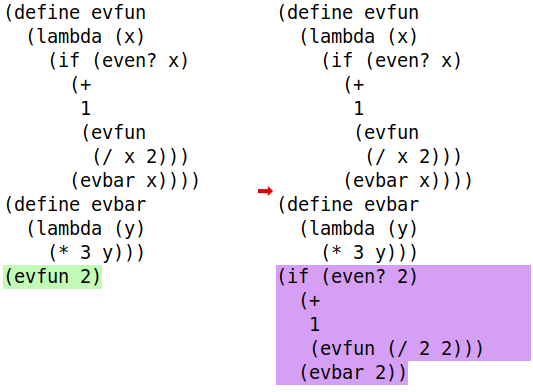

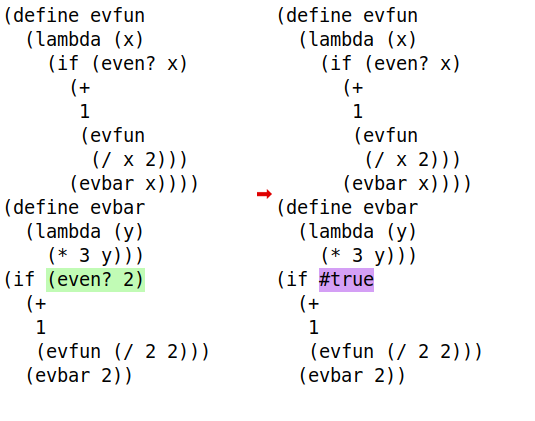

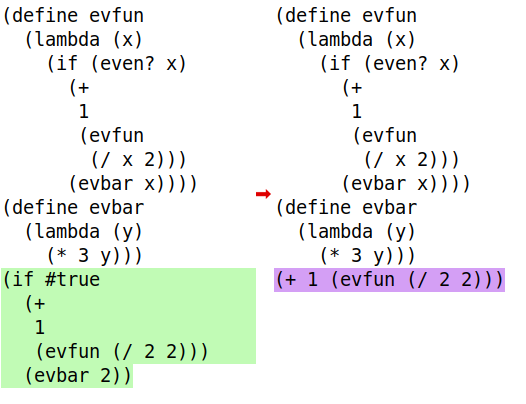

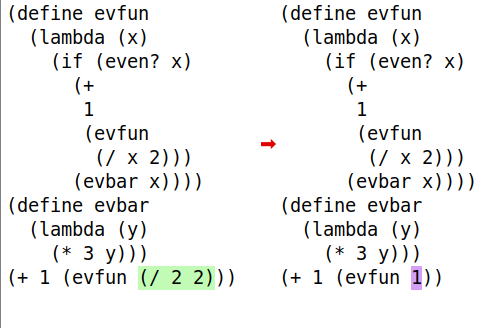

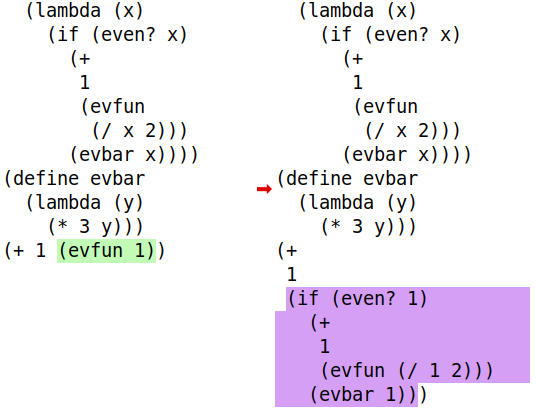

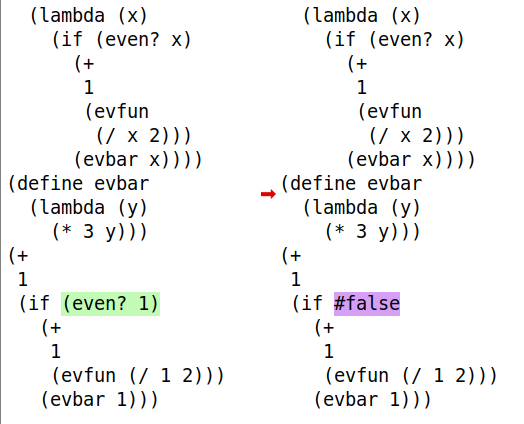

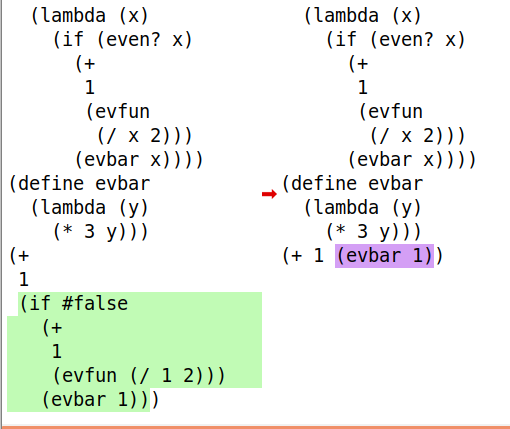

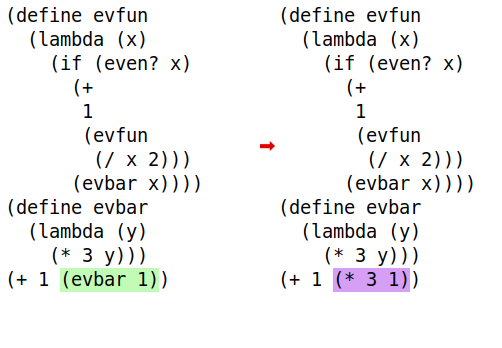

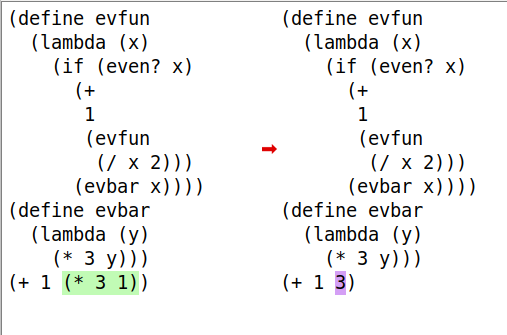

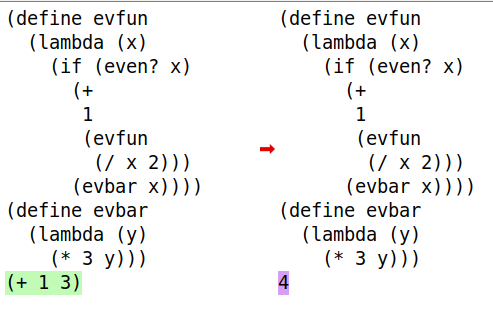

Did you get it? I am sure you did. In case not, here is a brief story:

2 was passed to the main evfun: since it 2 is even, we proceeded to the next stage, which includes a recursion: divide x (in this case x is 2) over 2. Send this to main `evfun`: is it even? 

2/2 is 1, so 1 is not even. Since this is false, send the result to a tail call. A tail call occurs when a function's result is just the value of another function call. In our case, the result of `evfun` depends on what `evbar` gives it, since 1 is not even. 

So since `evbar` triplicates any value passed to it, we get: 3. Now send this back to the post-recursive part in the main body of the `evfun`: there we have an unresolved 1 to add to this tail call result: so 3 + 1 = 4.

See if you can apply this and verify the following results:

In [5]:
(evfun 8)

6

In [6]:
(evfun 1)

3

In [7]:
(evfun 20)

17

With this out of the way, we are now able to define tail recursion. What we did is define a recursive function `evfun` which encapsulated the results of another function `evbar`. Asking evbar to supply value to evfun is a tail call. Evfun is a recursive function, which has made use of a tail call to evbar. 

Before we go deeper into tail recursion, let's do some exercises. Define a function that makes use of recursion. Any topic is fine. You can see mine below:

In [8]:
(define (fibonac n)
     (if (<= n 2) 1
         (+ (fibonac (- n 1)) (fibonac (- n 2)))))


What makes recursion difficult to grasp is the idea of 'incompleteness'. We are using `fibonac` to make `fibonac`. How can that be?

It helps to think of a recursive function as a freezer. So:

`(define (freezer water)
    below-zero condition
    (other condition (freezer (water))))`
    
So our freezer recursive function has a main condition, in this case, temperature below 0 causing the freeze. So on the water input, the freezer's main condition is applied. If nothing else is required, it will not go to other condition. In this respect, it has acted, so far, like any other normal function or procedure.

Now, what happens if we add "other condition"? There are times that other conditions do not want water, but they want ice, to make their output. Since our `freezer`'s main task is below-zero conditions, why not make use of it in the 'other condition'? 

Thus, we are re-using freezer on itself. Although gross, this is akin to the analogy of a certain hungry animal that eats parts of itself in order to survive. Luckily, in our case, recursive functions are not like animals. They don't HAVE to survive. They can survive fine, and make use of their own selves only when necessary.

What do I mean by this? In:

In [9]:
(fibonac 2)

1

There is no need for recursion. It evaluates to the main condition. Only when input is more than 2, 'other condition' kicks into place:

In [10]:
(fibonac 4)

3

We will return to tail recursion later. For now, let's do some interesting exercises. But if you find yourself still unsure about recursion, [this excellent analogy](https://people.eecs.berkeley.edu/~bh/ssch13/convince-recur.html) will definitely help! 

Now exercises: using `map` and `range` use the `fibonac` to produce a range of fibonaccio values between 4 and 30. The 5th chapter of Eisenberg book has not covered map and range, but I think you can guess how to use them!

Here is my solution (use DrRacket, as Racket kernel on Jupyter may give errors):

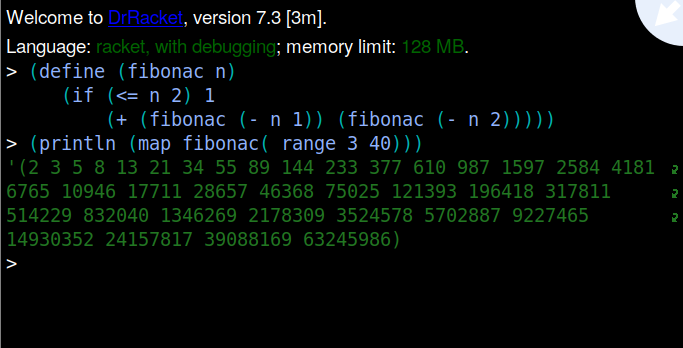

It will take some time for the results of this function, though, since it is purely recursive procedure. In any case, Scheme/Racket takes less time than Python, for a similar fibonacci recursive procedure. We will discuss code optimization in the future.


Now, let's practice! 

Write a proc that takes a list of n items, and returns another list, cubing each element. (raising to the power of 3). Do not use any loops, and your proc must be recursive. 

Solution:

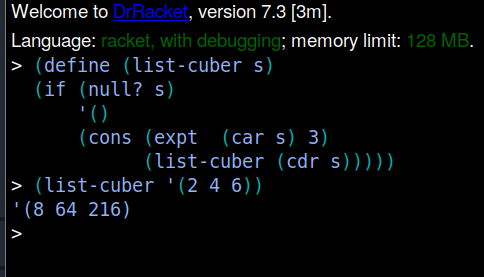

Can you see how we made use of car and cdr to avoid loops? This is vrey powerful, but more on this later.

Ex1 b: write a recursive proc giving the sum of squares of a series: 0^2 + 1^2 + 2^2 ... n^2. Here is a hint for summing consequtive integers (discovered by Gauss when he was 5 or 6):

Suppose I have n=5. What is adding everything from 0 to 5?

1+2+3+4+5 = 15. Is there a shorter way?

There are two shorter ways. One is Gaussian, the other recursive. The Guassian is not that different from the recursive, though, as we shall see. The goal is to write your proc without using the Gaussian short-cut, which is: 



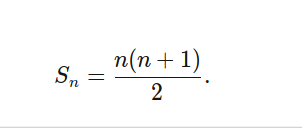

So try writing the suum of integers proc first. Even if you eventually fail, the process of your failure will teach you invaluable insights. 

**** 
Welcome back. I am going to give you a hint now. This sum of integers recursive function in C. It does not matter if you know C or not (I am betting on you not knowing it). Use the ideas here to write your own sum of squares of integers recursive procedure in Scheme:

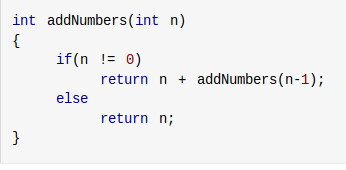

Here is my solution to the sum of integers:

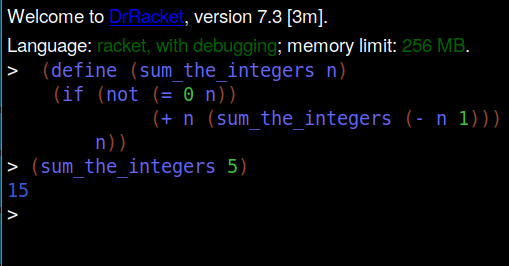

If you were struggling, use the abovee template to write your sum of int squares. 
        
Before you proceed, though, you may be tempted to use some 'naming' syntax that should allow you to finish your task. Consider:

In [11]:
((lambda (p)
   (* p p))
 100)

10000

We are saying let a throw-away, nameless function take a value p, then multiply it to itself. After that we also supply the value for p. Another way to do this is with let, which I personally don't like:

In [12]:
(let ((p 100))
  (* p p))

10000

An even better way is this:

In [13]:
(define p 100)
  (set! p (* p p ))
  
p

10000

This last method is better because when the code becomes larger, we don't need to hunt for mising or wrong-place parentheses. It is also instantly more readable. 

We are saying, get something called p, and initially give it a value of 100. Then, re-set the value of p, such that it iss p * p. Now p is available all over the program, as a re-usable variable.

Try using this for a var that is named Wario (my pet cat), and give it an initial age of 1 day. Then re-set it so, that Wario becomes 240-days old.

In [14]:
(define Wario 1)
(set! Wario (+ 239 Wario))

Wario

240

However, what I want to suggest is that there is no need for elaborate structures, whena simple mental tweak would do. Back to sum of squared integers, here is my code without using any lambdas or sets! or lets:

In [15]:
(define (sumsqint n )
  (if (not(= 0 n))
      (+ (* n n) (sumsqint (* (- n 1) (- n 1) ))) n ))

(sumsqint 2)

5

This fine, in 'theory' but practically speaking, very slow. Partly because, well, Scheme is not Julia, and partly because we are using a purely recursive method.

Can we optimize this code using the existing algorithm?

This will bring us to the topic of tail recursion, which we will deal with it in the next notebook.

Now lest I forget, let's do a quick review solution for the last problem in notebook 6, which I had promised I would do:

In [16]:


(define (rand_list_gen n upper)
  (for/list ((i n))
    (add1 (random upper))))

(rand_list_gen 50 29)



'(16 12 28 6 8 17 14 11 27 26 12 11 9 27 22 16 4 21 29 25 21 9 25 10 8 23 12 6 10 9 11 17 24 14 7 23 3 20 25 5 26 28 11 3 8 8 27 11 29 18)

If you recall, this is the stage we had reached. We used an explicit looper here `for/list` iterating over i upto n times, for values generated not exceeding the upper floor of 29. To each iteration, we used `add1` to insert/append the randomly generated int into the output.

Now, let's define a proc that finds the minimum value here:

In [17]:
(define mylist
'(   21 24 24 14 23 24 11 6 23 
     23 22 15 7 28 1 5 15 17
     21 13 18 26 3 20 22 
     15 21 2 29 25 20 
     23 18 14 8 15 
     24 25 29 1
     2 3 1 19
     5 3 2
     5 27 
     18 ))



We can use a recursive method, and here is one very messy method. I don't like it because it wastes code:

In [18]:
(define (minimalvalue lst)
    (cond 
      ((null? (cdr lst)) (car lst))
      ((< (car lst) (minimalvalue (cdr lst))) (car lst))
      (else 
        (minimalvalue (cdr lst)))) )


Also, it is extremely slow. Let's try another on:

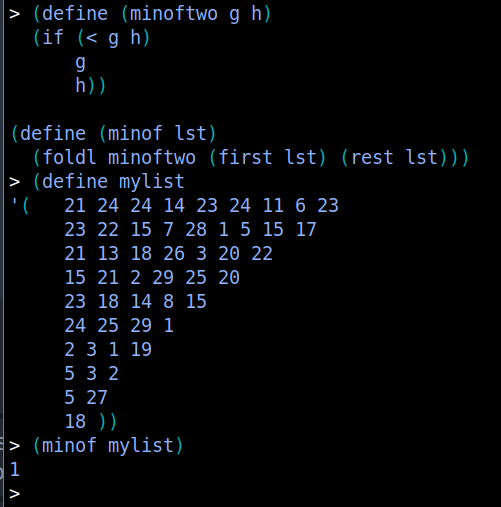

This one is faster, but of course, we have used a small trick not yet taught in the PS book. The `foldl` which takes results from `minoftwo` and extrapolates them to list of any values. Here is a step-by-step breakdown, which is 7 steps in total, whereas the previous code in line 81 is 32 steps!

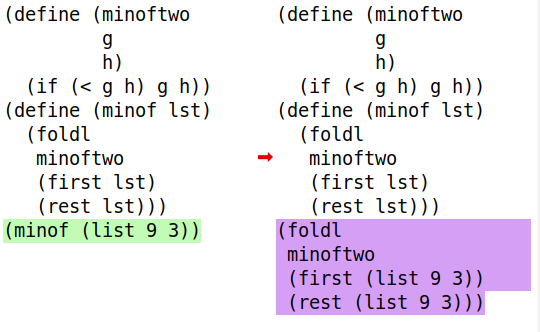

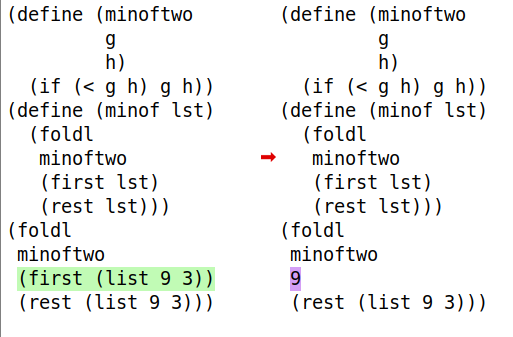

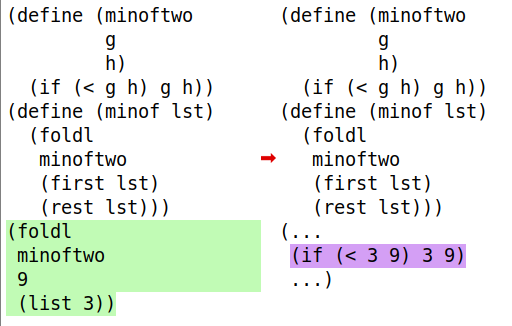

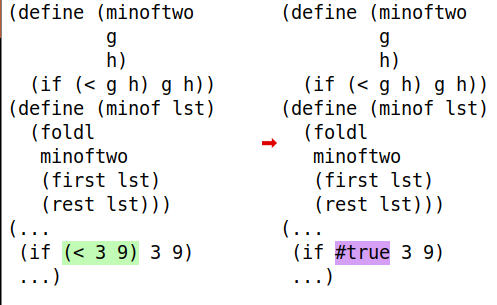

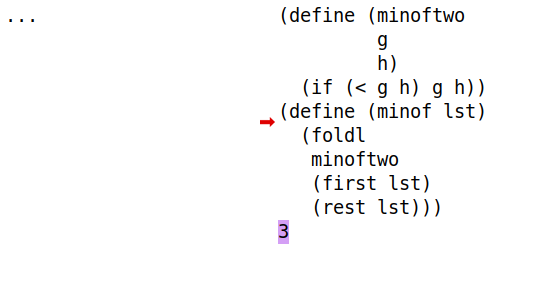

This concludes notebook 7.